Classification d'articles ArXiv

Équipe Yassine + JF + Yohan !

Yassine Kassis : KASY20109609; 
Yohan Finet : FINY05099600;
Jean-François G.Baril :  GIRJ08028200

# Table des matières
* [Section 1 : Introduction](#section1)
* [Section 2 : Construction de traits caractéristiques](#section2)
* [Section 3 : Algorithmes](#section3)
* [Section 4 : Méthodologie](#section4) 
* [Section 5 : Résultats](#section5)
    * [Section 5.1 : Bayes naïf](#section_5_1)
    * [Section 5.2 : Régression logistique](#section_5_2)
    * [Section 5.3 : Forêt aléatoire](#section_5_3)
    * [Section 5.4 : SVM](#section_5_4)
* [Section 6 : Discussion](#section_6)
* [Section 7 : Liste des contributions](#section_7)
* [Section 8 : Références](#section_8)
* [Section 9 : Appendice](#section_9)

## Section 1 : Introduction <a class="anchor" id="section1"></a>
Ce projet consiste a créer un classifieur de textes en implémentant un modèle de Bayes naïf et en utilisant d'autres modèles de notre choix. Les algorithmes ont tous pour objectif de classer des documents texte parmi une liste de 15 sujets différents, soient les quinze catégories. Un des objectifs consiste à obtenir un taux de bonne classification qui est supérieur à certaines références prédéfinies. L'entraînement a été fait sur un ensemble de 7500 documents classés par catégorie et les algorithmes ont ensuite été utilisés afin de classifier l'échantillon de test contenant 15000 documents.

Après avoir fait un prétraitement des données, notre approche a été de comparer les taux de bonnes classifications de différents algorithmes sur un ensemble de validation en faisant varier les hyperparamètres pour chacun d'eux. Nous avons ensuite choisi le modèle qui donnait le meilleur taux de bonnes classifications.

Après avoir implémenté le classifieur de Bayes naïf et avoir dépassé toutes les références avec celui-ci, nous avons exploré différents algorithmes, notamment la regression logistique, le SVM et la forêt aléatoire. Nous avons obtenu le meilleur taux de bonnes classifications avec le modèle de régression linéaire, soit un taux de 80,98%.

## Section 2 : Construction de traits caractéristiques<a class="anchor" id="section2"></a> 
La première étape consiste bien sûr à effectuer un prétraitement des données.  Les textes étant assez longs et n'importe laquelle des catégories comportant des termes qui ne permettent en rien d'identifier cette dernière, il était important de filtrer le contenu des articles afin de ne garder que les mots qui puissent nous permettre de prédire la catégorie avec le plus de précision possible.  Les articles à classifier étant en anglais, nous avons d'abord tenté de trouver les structures possibles des mots dans cette langue.  Nous avons ainsi dû retirer tous les mots d'une lettre qui sont souvent utilisés dans les cas de mots tronqués ou à la fin d'un mot pour représenter le possessif. Par exemple, dans "sun's", le seul mot d'intérêt est "sun", il faut donc retirer les "s" uniques ainsi que les " ' " qui les précède.  Nous avons d'abord enlevé les caractères spéciaux: accents, signes de ponctuation et autres, les mots composés d'un seul caractère et les chiffres et ce, pour chacun des documents des ensembles d'entraînement et de test. Nous avons également remplacé les sauts de ligne par des espaces et les espaces multiples par des espaces simples afin de n'avoir qu'un échantillon de mots. Nous avons ensuite produit une liste de mots trop communs en anglais pour qu'ils ne permettent une inférence sur la catégorie et nous avons retiré ces mots de chacun des articles.  La liste de mots se trouve en appendice (section 9).

Ces étapes ont été répétés sensiblement sans changements dans tous les modèles construits.  Certaines méthodes automatisées étaient permises pour les modèles autres que l'estimateur Bayes naïf.  Pour ce dernier, le traitement a dû être programmé "from scratch" de la manière suivante:

Après avoir retiré les mots, caractères spéciaux et espaces tel que discuté plus haut, nous avons remarqué que les lettres grecques étaient souvent utilisées dans ces articles.  Nous avons donc créé la liste de lettres grecques en anglais disponible en appendice.

Dans le parcours des mots de chaque article, nous avons remplacé les lettres grecques dans leurs caractères originals par leurs versions littérales anglaises. Un dictionnaire est ainsi créé pour chacune des catégories d'articles avec les mots que l'on n'a pas retirés dans le processus de filtrage.  Nous avons ensuite vectorisé ce dictionnaire pour chacuns des mots en utilisant la méthode "one-hot", c'est-à-dire que l'on a attribué une position dans une matrice pour chaque mot du dictionnaire de chaque classe.  On passe ensuite sur chacun des articles et on attribue un "1" aux mots qui sont dans l'article en question et un "0" à ceux qui ne le sont pas. 
Nous avons ensuite déterminé la probabilité de présence d'un mot dans chaque classe en les comptant et, finalement nous avons trouvé les mots les plus fréquents avec la condition que leur probabilité d'être dans une catégorie devait être supérieure au double de toutes les probabilités des autres mots.

Pour les algorithmes supplémentaires qui ont été codés, nous avons utilisé WordNetLemmatizer du package nltk.stem afin de transformer les mots de chaque document dans leur forme de base. Nous avons ensuite utilisé TfidfVectorizer de la librairie scikit-learn afin de transformer les documents en vecteurs où chaque composante d'un vecteur représente la valeur tf-idf d'un mot. Chaque valeur tf-idf est proportionnelle à la fréquence d'un mot dans un document et inversement proportionnelle au nombre de documents qui contiennent ce mot. Nous avons calculé ces valeurs pour les mots uniques et nous avons également testé l'influence des combinaisons de plusieurs mots avec l'argument ngram_range.  Nous avons découvert que la fréquences des bigrams, séquences de deux mots, avaient une fréquence assez élévée pour être utilisés mais pas les n_grams de plus de deux mots.  Nous avons donc limité le ngram_range à (1,2) :

In [6]:
#TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer(sublinear_tf=True, 
                         min_df=3, 
                         norm='l2',
                         encoding='latin-1', 
                         ngram_range=(1, 2), 
                         lowercase=False)

Puisque nous n'avions pas accès aux labels de l'échantillon de test, nous avons séparé l'ensemble d'entraînement en deux sous-ensembles : un sous-ensemble d'entraînement de 6000 articles et un autre de validation contenant les 1500 articles restants. Pour ce faire, nous avons aléatoirement choisi 400 messages dans chacune des catégories afin de créer un jeu de données d'entraînement et nous avons réservé les 100 messages par catégories restants pour fin de validation. 

## Section 3 :Algorithmes<a class="anchor" id="section3"></a> 
Tel que demandé, nous avons tout d'abord créé un classifieur de Bayes naïf de toutes pièces pour classifier les différents documents. Cet algorithme utilise le théorème de Bayes : 

$P(c|d) = \frac{P(d|c)P(c)}{P(d)}$ 

où "d" représente un article et "c" le sujet de ce dernier. Le classifieur de Bayes naïf fait l'hypothèse que les mots d'un document sont indépendants sachant la classe. La classe prédite par le classifieur est donc donnée par la classe qui maximise le produit de $P(c)$ avec le produit des $P(w|c)$ pour chaque mot dans le document à classifier.   $P(c)$ représente la proportion d'articles de la classe "c" et P(w|c) est le nombre d'occurrences du mot "w" divisé par le nombre de mots dans tous les documents de la classe "c".

Après plusieurs tests, nous avons opté pour la variante Bernouilli du classifieur de Bayes naïf.  Cette méthode permet de pénaliser particulièrement les non-occurences de certains mots dans un article pour faire la classification sous la règle de décision suivante :

$P(x_i|y) = P(i|y)x_i + (1-P(i |y))(1 - x_i)$

Où l'on voit que l'absence du feature i est pénalisée alors qu'elle serait complètement ignorée dans la version initiale de classifieur de Bayes.

Nous avons également utilisé l'algorithme de régression logistique qui est essentiellement un "réseau" de neurones avec un seul neurone et dont la fonction d'activation est la fonction sigmoïde. Une descente de gradient est utilisée afin de minimiser la fonction de coût choisie.

L'algorithme du SVM a également été utilisé. Cet algorithme a pour but de trouver un hyperplan qui maximise la distance entre l'hyperplan et les points d'entraînement les plus près, c'est à dire l'hyperplan qui maximise la marge.

Un algorithme de forêt aléatoire a aussi été utilisé afin de classifier les documents. Une forêt aléatoire entraîne plusieurs arbres de décision sur des sous-ensembles de l'ensemble d'entraînement et prédit une classe en moyennant les prédictions de tous les arbres. Chacun des arbres a plusieurs branches qui se divisent toutes en 2 jusqu'à arriver aux feuilles. À chaque embranchement l'algorithme détermine quelle variable permet de prédire le mieux la classification d'un document.

## Section 4 : Méthodologie<a class="anchor" id="section4"></a>
Comme mentionné dans la section 2, puisque nous n'avions pas accès aux labels de l'échantillon de test, nous avons décidé de scinder l'échantillon d'entraînement en 2 sous-ensembles en utilisant un rapport de 80/20 entre le sous-ensemble d'entraînement et l'ensemble de validation.  Nous avons également essayé de prendre des rapports 75/25 et 85/15 mais notre taux de bonnes prédictions s'en trouvait généralement lésé de 2-5% selon le modèle utilisé.  Considérant la taille de l'échantillon disponible, notre réflexe de prendre le rapport 80/20 a été confirmé comme étant celui qui offrait une plus grande précision.  

Outre le fait que le traitment s'est fait à la main pour l'algorithme du Bayes naïf, nous avons pratiquement fait le même traitement de données dans tous les algorithmes.  

Pour les méthodes alternatives, nous avons, dans tous les cas, testé les résultats pour les paramètres de la fonction TfidfVectorizer afin de trouver les meilleures conditions pour obtenir une plus grande précision. 

Notre méthode pour optimiser a consisté à faire les prédictions avec une même méthode, sur un même jeu de données mais avec une liste de valeurs différentes de l'hyperparamètre à analyser.  Nous avons toujours répété cette méthode sur plusieurs échantillons d'entraînement et de test afin de choisir l'hyperparamètre qui, en moyenne, donnait de meilleurs résultats.

## Section 5 : Résultats<a class="anchor" id="section5"></a> 

### Section 5.1 : Classifieur de Bayes naïf<a class="anchor" id="section_5_1"></a> 
Dans le cas du Bayes naïf, nous avons testé plusieurs valeurs du paramètre alpha : le paramètre de lissage de Laplace.  Ce paramètre permet de contrer un problème rencontré lors du travail fait sur le jeu de test.  En effet, si dans le parcours des mots d'un article du jeu de test, nous rencontrons un mot qui n'est apparu nulle part dans le jeu d'entraînement.  L'utilisation du lissage par alpha permet de ne pas complètement ignorer ces mots qui ne seraient pas apparus dans le jeu d'entraînement mais qui le sont dans le jeu de test en ajoutant une probabilité minimale de se retrouver dans une classe pour chacun des mots rencontrés. Nous avons donc testés plusieurs valeurs pour ce paramètre et avons obtenu les résultats optimaux avec une valeur de 0.15.

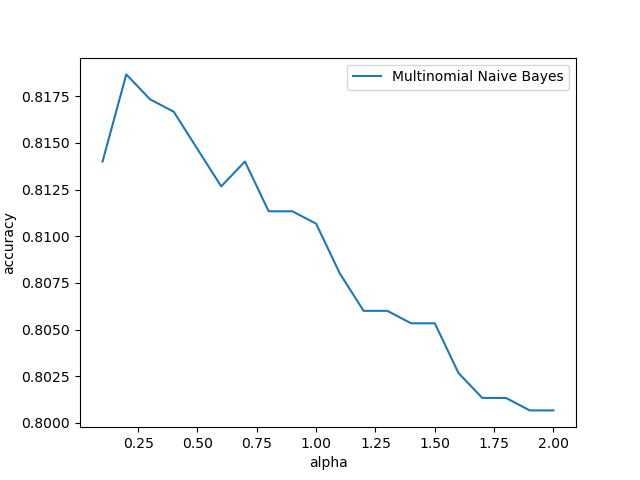

<center>Figure 1 : Taux de bonnes prédictions par l'algorithme de Bayes naïf multinomial pour différentes valeurs de alpha.

Nous avons obtenu la matrice de confusion suivante pour cet algorithme avec le paramètre alpha fixé à 0.15 :

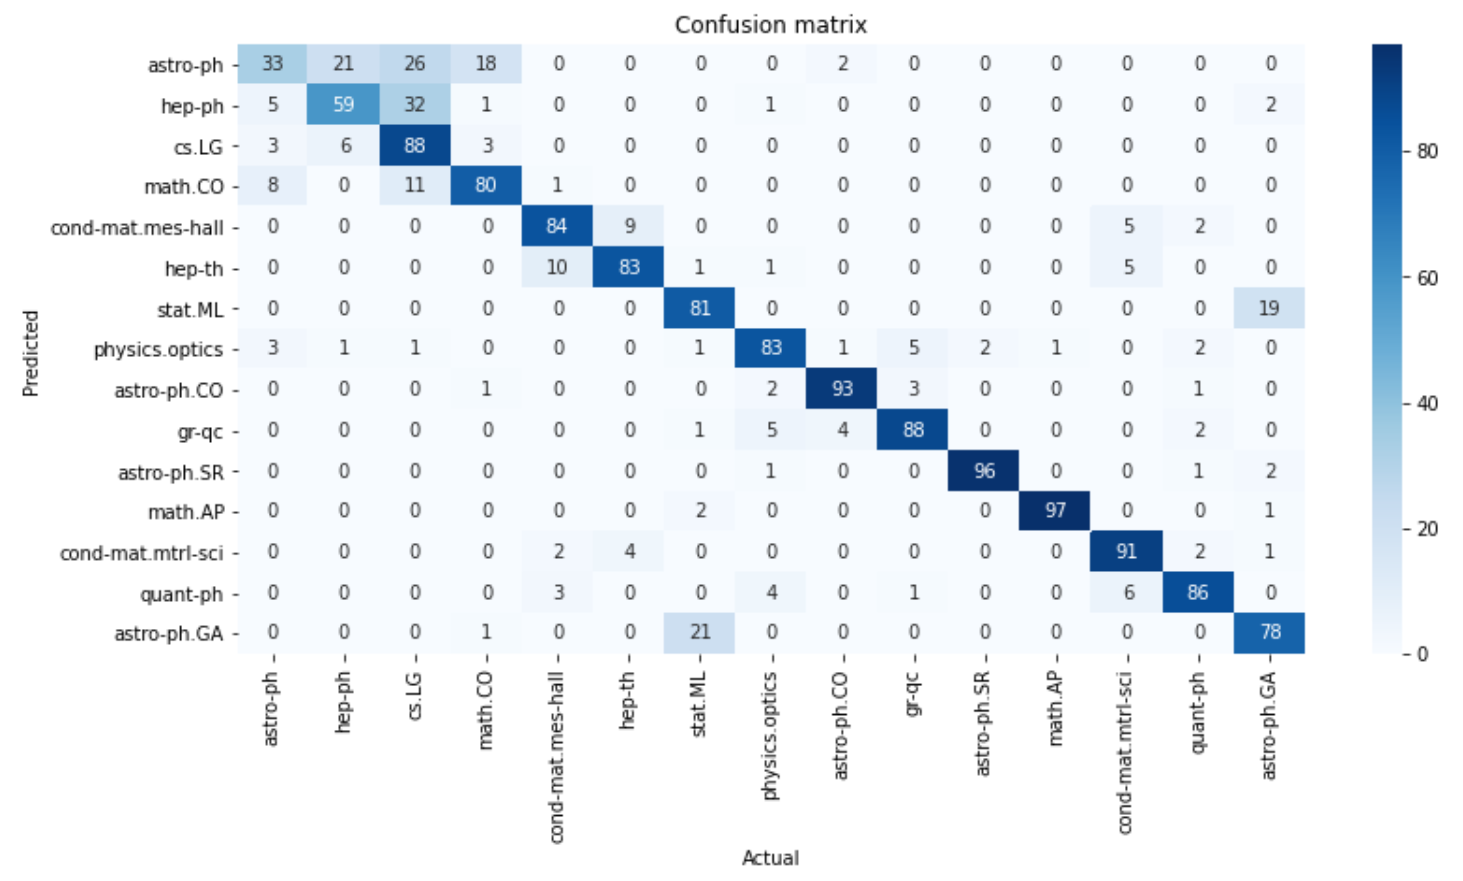

### Section 5.2 : Régression logistique<a class="anchor" id="section_5_2">

Le deuxième algorithme qui a été développé est une régression logistique.  Il s'agit d'un classifieur linéaire qui cherche à trouver la frontière de décision optimale dans l'hyperplan définit par les points d'entraînement.  Le modèle utilisé, comme tous ceux des méthodes alternatives est celui de scikit-learn.  L'hyper-paramètre avec lequel nous avons fait des comparaison est 'C' qui permet d'ajuster l'inverse de la puissance de régularisation.  Pour choisir la meilleure valeur de 'C', nous avons testé le même échantillon avec des valeurs de 1.0, 0.1 et 0.01 en comparant les prédictions faites sur un même échantillon avec les 3 valeurs possibles.  Ce test a été répété 15 fois sur des échantillons différents à chaque itération afin de trouver la valeur optimale, qui a été, pour notre problème, la valeur par défaut de 1.0.  


Nous avons obtenu la matrice de confusion suivante pour cet algorithme avec le paramètre C fixé à 1.0 et une pénalité l2 :

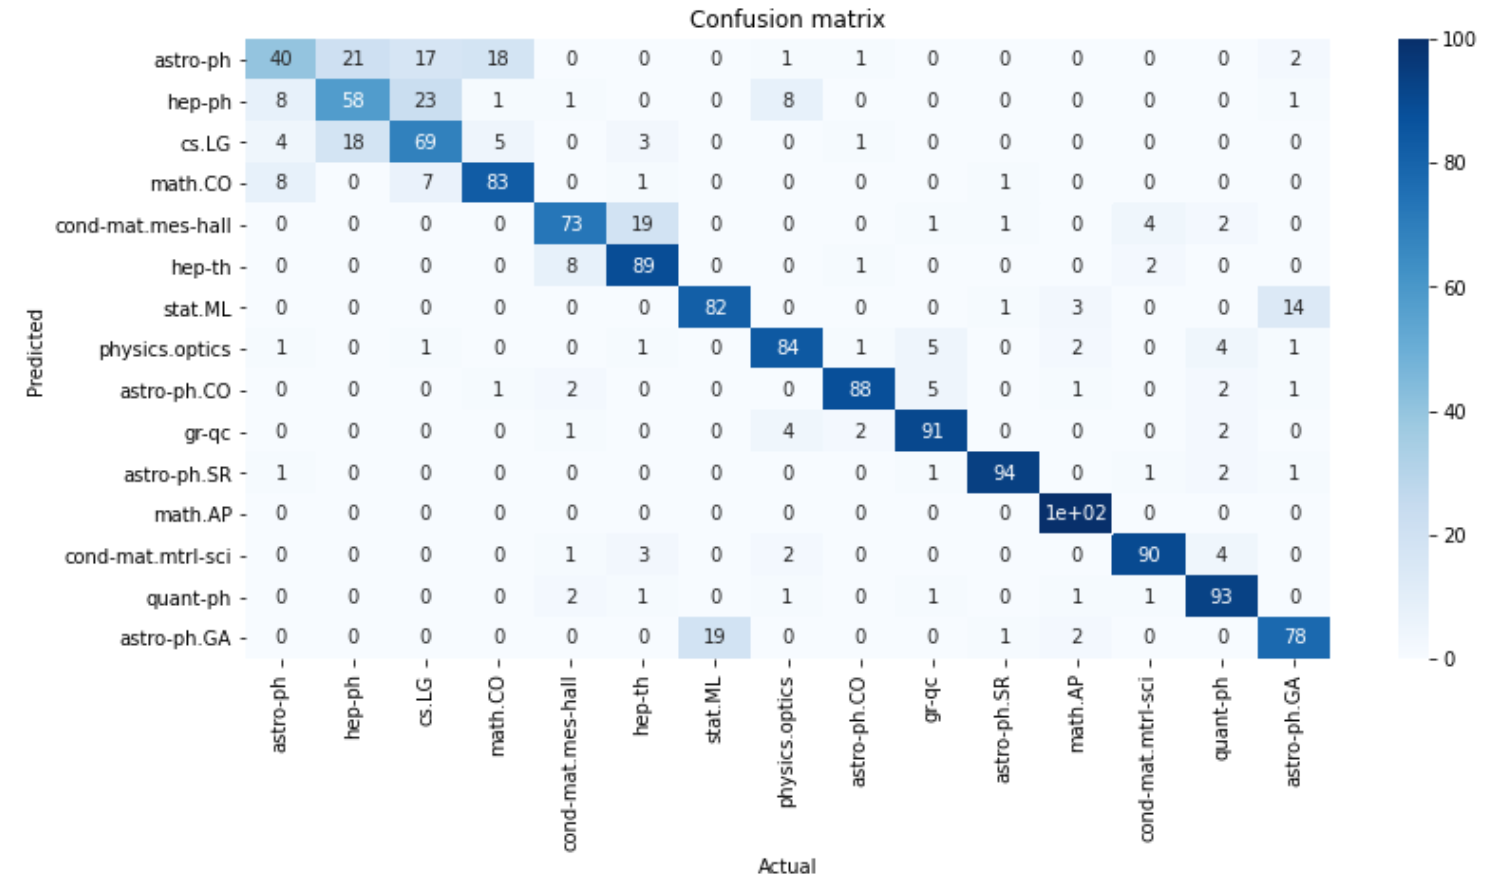

### Section 5.3 : Forêt aléatoire<a class="anchor" id="section_5_3"></a>



Nous avons également entrainé des forêts aléatoires afin de prédire les classes des documents. Pour ce faire nous avons utilisé la classe RandomForestClassifier de la librairie scikit-learn. Pour cet algorithme, nous avons testé différentes valeurs de profondeur pour les arbres. Un arbre aillant une plus grande profondeur permet une plus grande expressivité du modèle, mais est également sujet au sur-apprentissage. Nous avons également testé différents critères pour déterminer la variable a choisir aux noeuds des arbres. Les deux critères que nous avons testés sont l'impureté de Gini et le gain en information. On peut voir sur le graphique ci-dessous que le meilleur modèle que nous avons obtenu est celui avec le critère d'impureté de Gini et une profondeur de 45.

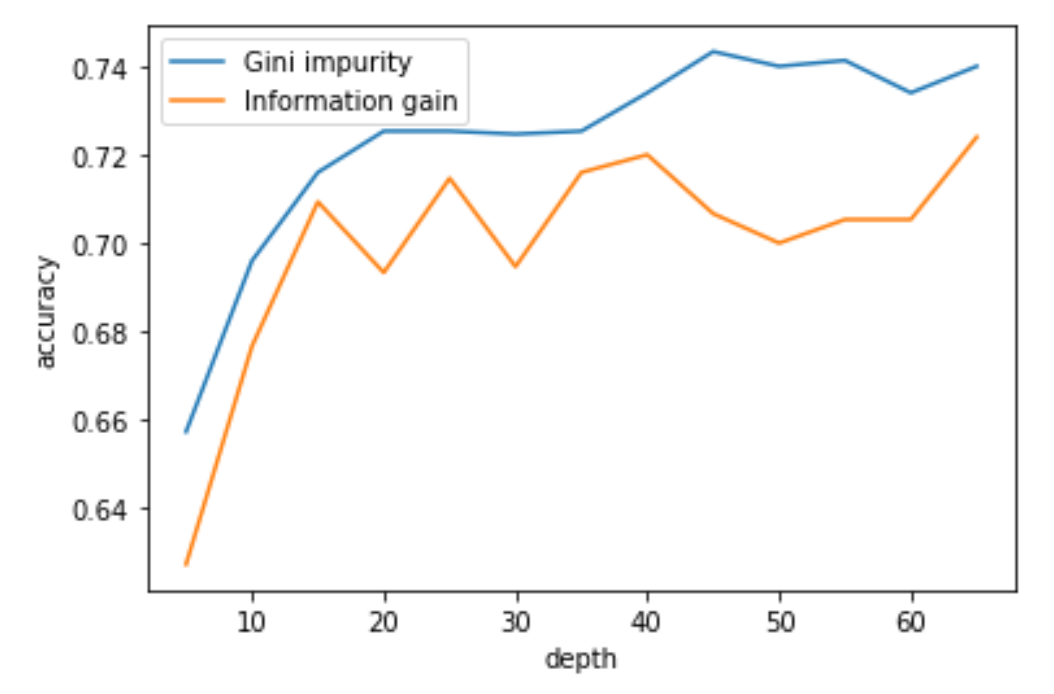

<center>Figure 3 : Taux de bonnes prédictions par l'algorithme de Forêt aléatoire pour différentes valeurs de profondeur et deux différents critères.

Nous avons obtenu la matrice de confusion suivante pour cet algorithme avec le critère d'impureté de Gini et une profondeur de 45 :

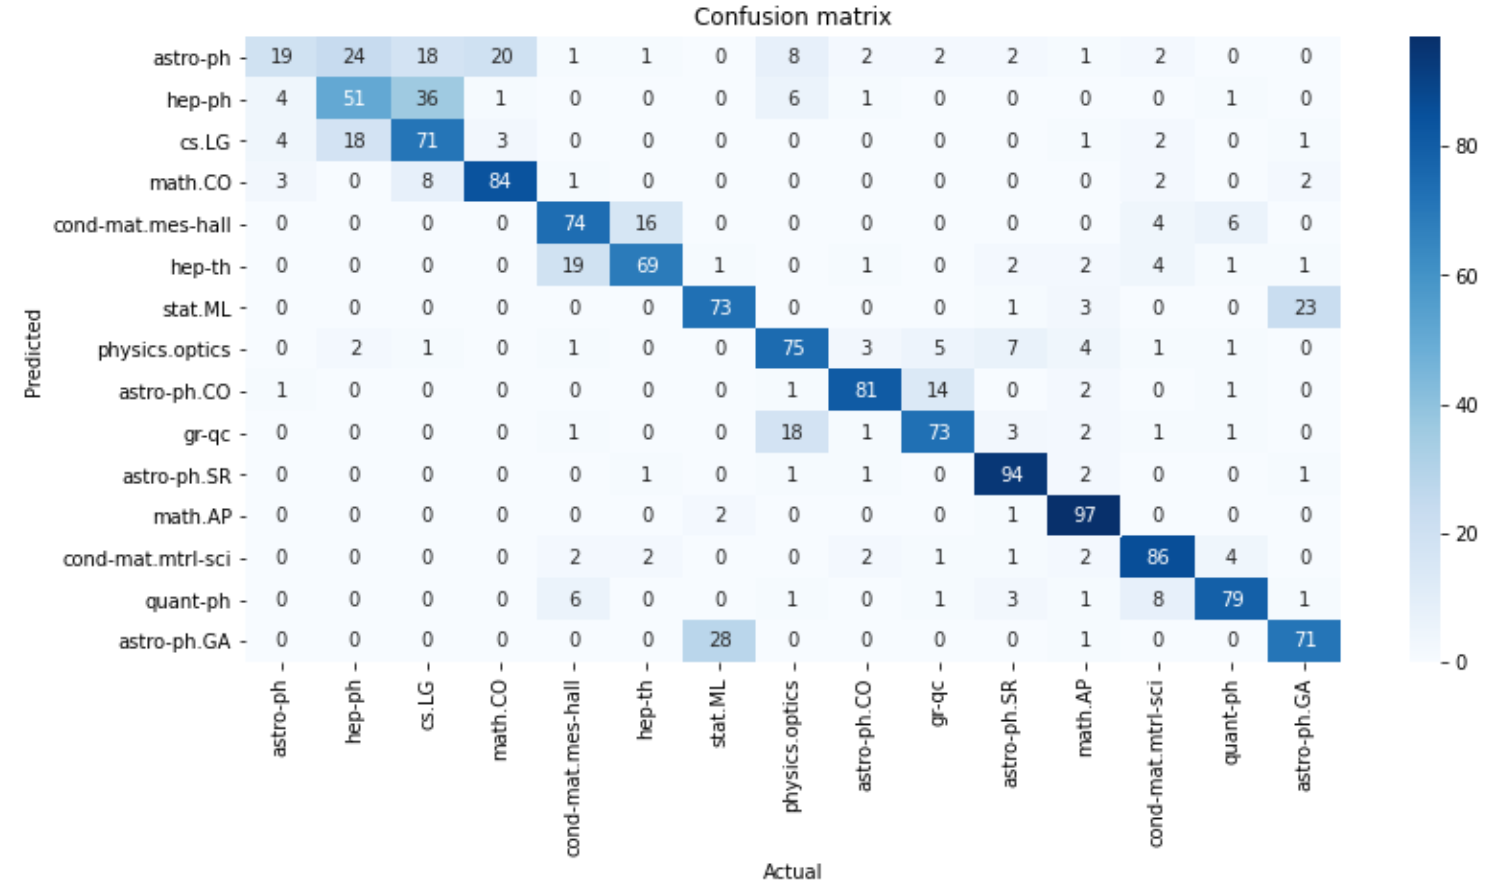

### Section 5.4 : SVM<a class="anchor" id="section_5_4"></a>
Pour l'algorithme de SVM.SVC, nous avons testé plusieurs des hyperparamètres du modèle de scikit-learn.  Nous avons aussi exploré les différentes configurations qui seraient plus efficaces dans la prédiction des catégories problématiques mentionnées dans la section précédente.  Tout d'abord, parlons du traitement des données.  Avec plusieurs itérations faites avec des valeurs différentes dans les paramètres de la fonction TfidfVectorizer, nous avons remarqué une nette amélioration dans la précision des prédictions des catégories astro et, en considérant que les monograms tout en ajustant les paramètres min/max_df, respectivement à 1 et 125 avec un nombre de features maximal de 10 000 plutôt que 3000 dans le cas des prédictions sur toutes les catégories.  Malheureusement un système à deux vitesses n'a pas pu être élaboré, faute de temps, mais nous avions une bonne piste (voir section suivante). 
Pour ce qui est de l'optimisation du modèle SVM, nous avons comparé les résultats des différentes fonctions de noyau disponibles avec, en moyenne, de meilleurs résultats avec le "rbf". Nous avons aussi utilisé notre méthode d'optimisation sur le paramètre de régularisation "C" qui nous a donné les meilleurs résultats dans sa valeur par défaut de 1.0.  La précision maximale obtenue avec ce modèle est de 80.5%.

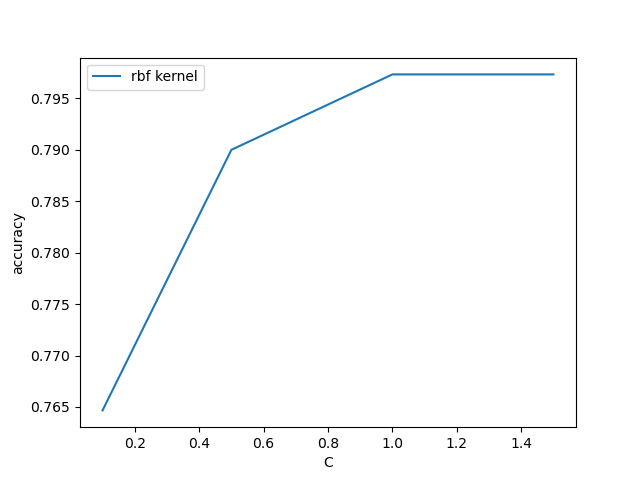

Voici la matrice de confusion que nous avons obtenu (à noter que les catégories associées aux lignes et colonnes des matrices de confusion peuvent être trouvées dans la section 9) :

## Section 6 : Discussion<a class="anchor" id="section6"></a> 
De façon générale, comme il a déjà été mentionné, tous nos algorithmes ont un haut taux d'erreur de classification pour certaines classes.  Nous prédisons avec une moyenne de précision autour de 75 % sur tous les algorithmes mais si nous enlevons les trois premières catégories, notre précision moyenne fait un bon de plus de 5 %.  Nous avons donc tenté de d'abord trouver une solution à deux vitesses mais par manque de temps, nous nous sommes rabattu sur le modèle le plus généralement performant parmi les quatres, c'est-à-dire la régression linéaire.

Le plus grand problème rencontré lors des erreurs de classification a été un très mauvais taux de prédiction de certaines classes, notamment les classes "astro-ph, astr-ph.CO et astro-ph.GA".  En effet, ces trois sujets étant des sous-catégories d'un même sujet général, le vocabulaire associé à ces articles est assez similaire, d'où les erreurs de classification.

Comme mentionné à plusieurs reprises dans ce rapport, les résultats obtenus ne sont pas mauvais, mais nous avons cerné une source de perte de précision importante pour laquelle nous n'avons pas eu le temps de trouver une solution qui soit pleinement satisfaisante.  En effet, comme on a pu le voir dans les matrices de confusion des résultats des divers algorithmes développés, le taux de bonne classification chute drastiquement dans les catégories : "astro-ph, astr-ph.CO et astro-ph.GA".  Nous avons développé plusieurs prototypes de classifieurs destinés à réévaluer les prédictions de ces sujets selon un nouveau classifieur utilisant un différent jeu d'hyperparamètres mais l'implémentation de ce double modèle n'a pas pu être mené à terme malgré des résultats prometteurs.

Si on analyse plus précisément les différents algorithmes, nous pouvons remarquer que la version Bernoulli du classifieur Bayes naïf est particulièrement efficace à classifier les articles venant de sujets non reliés.  Ceci étant dû à la pénalité sévère donnée à la non-occurence des mots du vocabulaire établi par catégorie.  

Le modèle de régression linéaire a lui aussi des soucis dans les catégories nommées mais fait légèrement mieux dans chacune des classes.  En effet le paramètre de lissage contribue un peu de la même façon que la particularité de Bernoulli pour pallier à la relative petitesse du jeu d'entraînement.

La forêt aléatoire a été notre modèle le moins performant.  Puisque le modèle ne permet pas d'adaptation aux articles de l'échantillon de test qui contiennent beaucoup de mots non inclus dans le vocabulaire créé pour chacune des catégories, nous perdons cette robustesse, ce qui mène à une trop grande perte de précision.

Finalement, le modèle SVM était assez prometteur mais cette fois-ci, bien que le niveau de précision sur les catégories générales soit plutôt bon, nous avons remarqué une grande perte de précision sur nos catégories problématiques.  Par contre,; nous avons remarqué que le SVM offrait également un avantage du point de vue des performances temporelles.  En effet, de tous les algorithmes développés, le plus rapide d'exécution a été le SVM.  Il aurait été idéal d'avoir un peu plus de temps de développment à notre portée puisque nous sommes convaincus que les performances du SVM auraient pu être poussées jusqu'à un niveau de précision supérieur.

## Section 7 : Liste des contributions<a class="anchor" id="section7"></a> 
Bien que chacun des membres de cette équipe ait contribué en partie à toutes les étapes de ce projet, surtout dans la définition du problème et dans la discussion des solutions à développer, des efforts particuliers ont été déployés par les membres suivants dans les tâches indiquées:
-Yassine Kassis, a travaillé particulièrement sur le développement de l'algorithme de classification de Bayes naïf et de régression logistique
-Yohan Finet a été particulièrement impliqué dans le développement du classifieur de forêt aléatoire et dans la rédaction du rapport
-Jean-François Baril a quant à lui travaillé sur le modèle SVM et la rédaction du rapport.

## Section 8 : Références<a class="anchor" id="section8"></a> 

Ces sites web ont été consultés à titre de référence pour le développement des algorithmes de forêt aléatoire et de SVM :

Bedi, G. (2020, July 13). Simple guide to Text Classification(NLP) using SVM and Naive Bayes with Python. Retrieved November 03, 2020, from https://medium.com/@bedigunjit/simple-guide-to-text-classification-nlp-using-svm-and-naive-bayes-with-python-421db3a72d34

Li, S. (2018, December 06). Multi-Class Text Classification Model Comparison and Selection. Retrieved November 03, 2020, from https://towardsdatascience.com/multi-class-text-classification-model-comparison-and-selection-5eb066197568

## Section 9 : Appendice<a class="anchor" id="section9"></a>


Liste de mots écartés d'emblée :

In [ ]:
no_word = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he'
           , 'him', 'his', 'himself', 'she', 'her','hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs'
           ,'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am','is', 'are', 'was', 'were'
           , 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and'
           , 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against'
           , 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in'
           , 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why'
           , 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only',
           'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now', 'd', 'll', 'm'
           , 'o', 're', 've', 'y', 'ain', 'aren', 'couldn', 'didn', 'doesn', 'hadn', 'hasn', 
           'haven', 'isn', 'ma', 'mightn', 'mustn', 'needn', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn']

lettres grecques :

In [ ]:
greek= ["alpha", "beta", "gamma", "delta", "epsilon", "zeta", 
        "eta", "theta", "iota","kappa", "lambda", "mu", "nu", 
        "xi", "omikron", "pi", "rho", "sigma", "tau", "upsilon", 
        "phi","chi", "psi", "omega"]

In [ ]:
dictionnaire des catégories pour les matrices de confusion :

In [ ]:
{
    'astro-ph': 0,
    'astro-ph.CO': 1,
    'astro-ph.GA': 2,
    'astro-ph.SR': 3,
    'cond-mat.mes-hall': 4,
    'cond-mat.mtrl-sci': 5,
    'cs.LG': 6,
    'gr-qc': 7,
    'hep-ph' : 8,
    'hep-th' : 9,
    'math.AP' : 10,
    'math.CO' : 11,
    'physics.optics' : 12,
    'quant-ph' : 13,
    'stat.ML' : 14
}